In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

: 

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\DataSets\Walmart_Sales.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)

In [4]:
df.isna().sum()
df.duplicated().sum()

0

In [5]:
df.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,1.577299e-13,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Date,1.577299e-13,1.000000e+00,0.006949,-1.328524e-02,0.145357,0.771444,0.077157,-0.248203
Weekly_Sales,-3.353320e-01,6.949360e-03,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,-1.328524e-02,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,1.453566e-01,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,7.714439e-01,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,7.715746e-02,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-2.482029e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [6]:
df.drop(['Date', 'Store'],axis=1, inplace=True)

<Axes: >

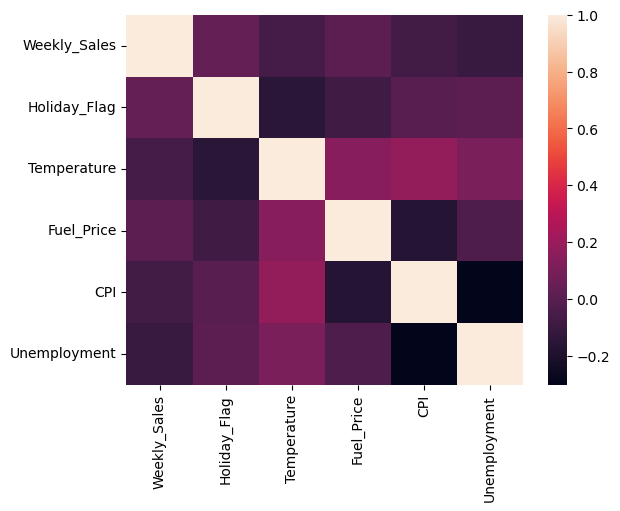

In [7]:
corr = df.corr()
sns.heatmap(corr)

In [8]:
df.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


In [9]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5985
1     450
Name: count, dtype: int64

In [10]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [11]:
df['holiday_impact'] = df['Weekly_Sales']*df['Weekly_Sales']

In [12]:
df.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,holiday_impact
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,0.960586
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.045219
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,-0.053939
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,-0.004049
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,-0.056579
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.117939
holiday_impact,0.960586,0.045219,-0.053939,-0.004049,-0.056579,-0.117939,1.000000


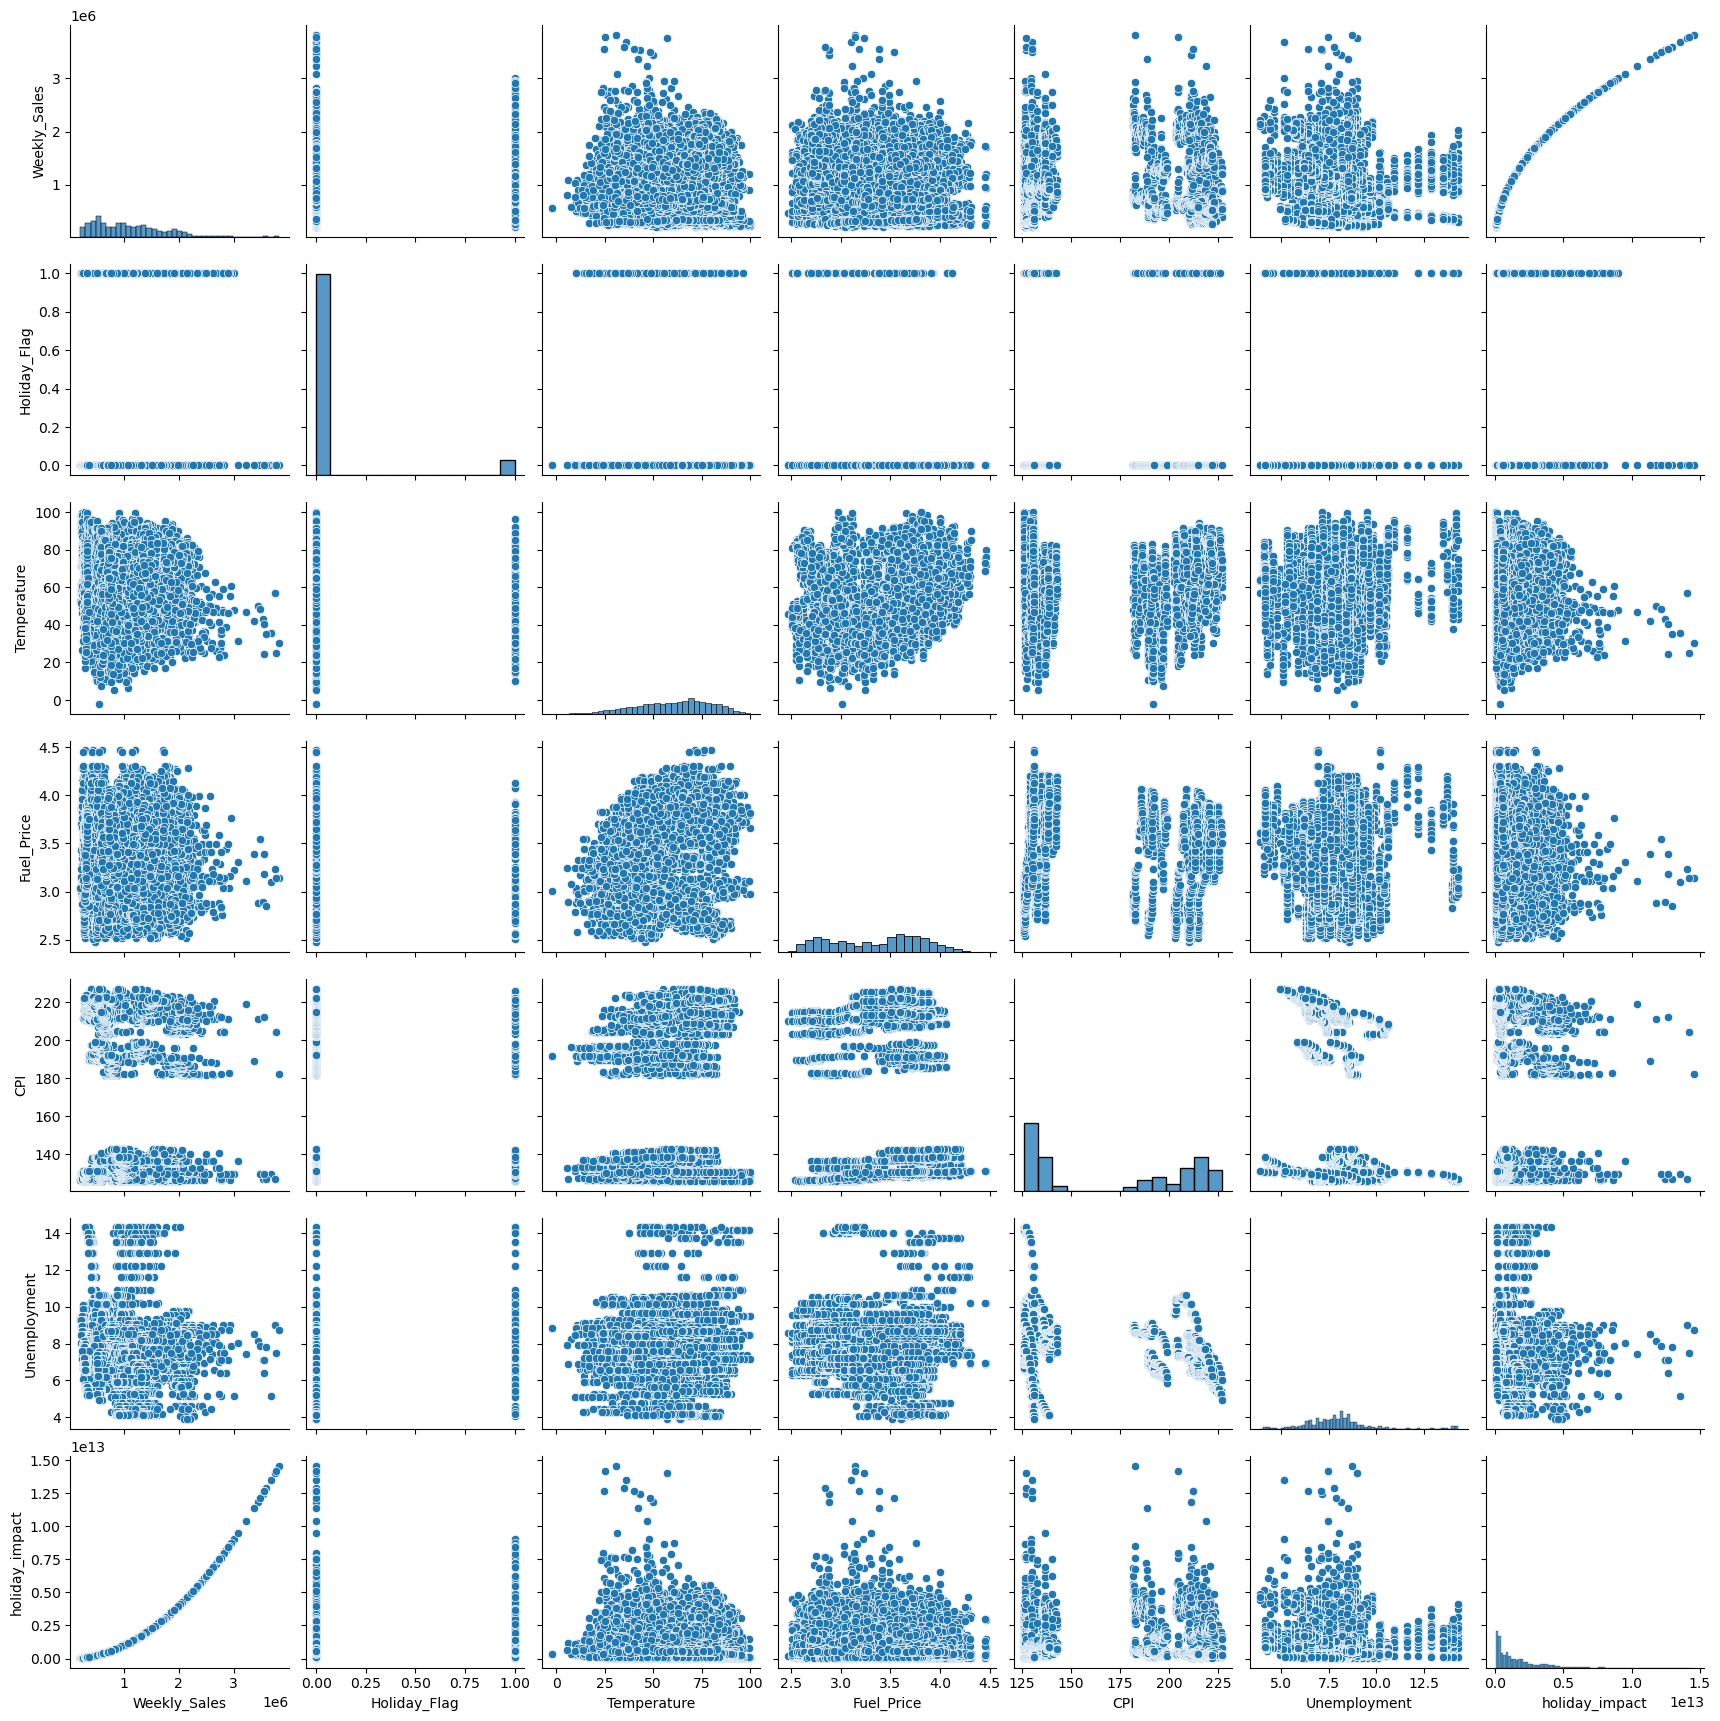

In [13]:
sns.pairplot(df)

In [14]:
fif = df.sample(100)

In [15]:
fif.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'holiday_impact'],
      dtype='object')

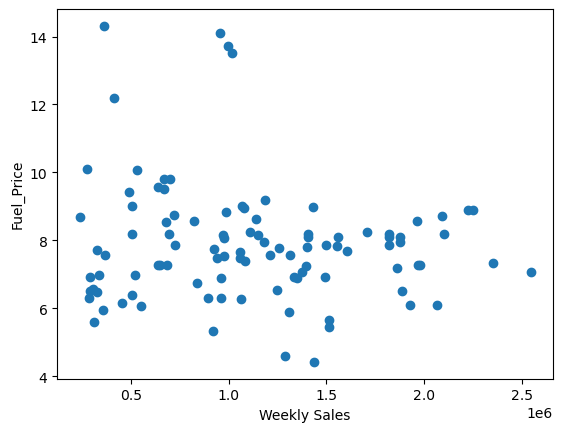

In [16]:
plt.scatter(data=fif, x='Weekly_Sales', y='Unemployment')
plt.xlabel('Weekly Sales')
plt.ylabel('Fuel_Price')
plt.show()

In [17]:
df.corr()['Weekly_Sales']['Unemployment']

-0.10617608965795235

In [18]:
df.drop('Fuel_Price',axis=1, inplace=True)
df.drop('CPI',axis=1, inplace=True)
df.drop('Temperature',axis=1, inplace=True)

In [19]:
df

,Weekly_Sales,Holiday_Flag,Unemployment,holiday_impact
0,1643690.90,0,8.106,2.701720e+12
1,1641957.44,1,8.106,2.696024e+12
2,1611968.17,0,8.106,2.598441e+12
3,1409727.59,0,8.106,1.987332e+12
4,1554806.68,0,8.106,2.417424e+12
...,...,...,...,...
6430,713173.95,0,8.684,5.086171e+11
6431,733455.07,0,8.667,5.379563e+11
6432,734464.36,0,8.667,5.394379e+11
6433,718125.53,0,8.667,5.157043e+11


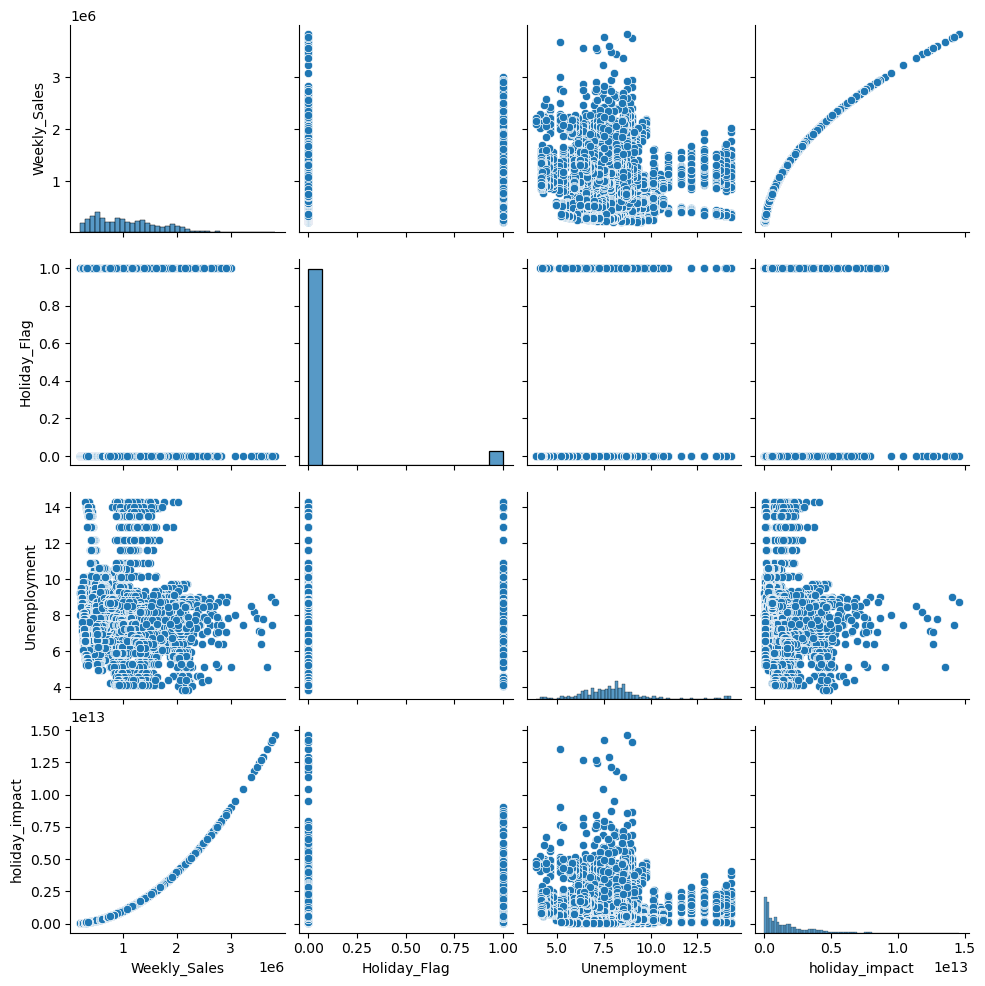

In [20]:
sns.pairplot(df)

In [21]:
x = df[['holiday_impact']]

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_fi = poly.fit_transform(x)
fea = poly.get_feature_names_out(x.columns)
df1 = pd.DataFrame(poly_fi, columns=fea)

In [23]:
df.drop('holiday_impact',axis=1, inplace=True)

In [24]:
df = pd.concat([df, df1],axis=1)

In [25]:
df.duplicated().sum()

0

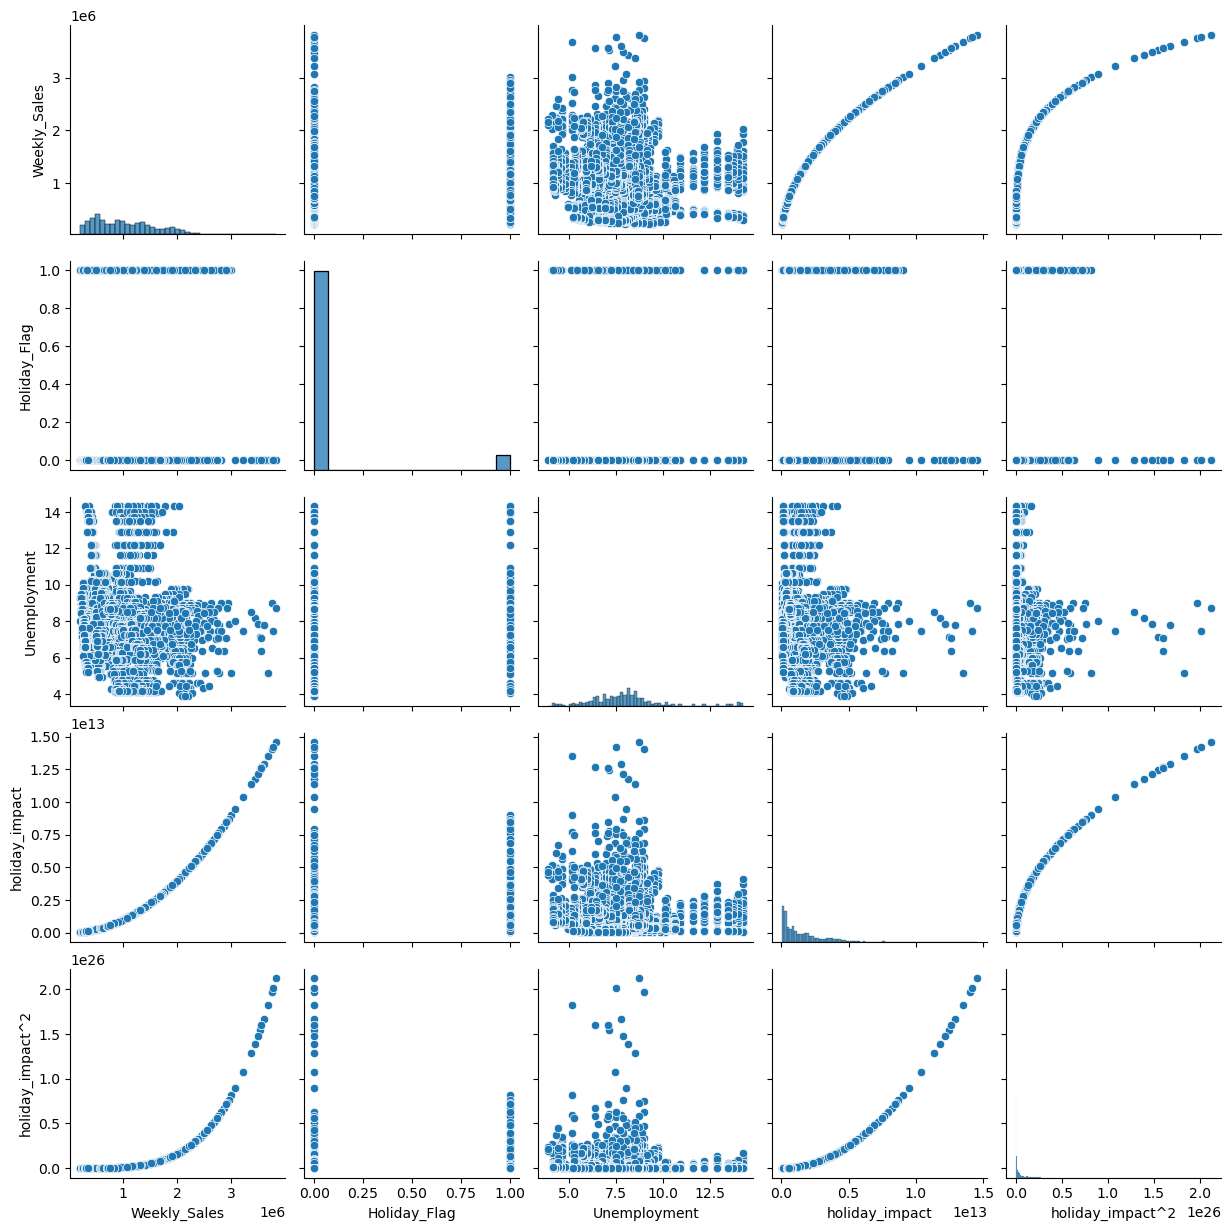

In [26]:
sns.pairplot(df)

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Weekly_Sales'] = scaler.fit_transform(df[['Weekly_Sales']])

In [28]:
df

,Weekly_Sales,Holiday_Flag,Unemployment,holiday_impact,holiday_impact^2
0,0.397291,0,8.106,2.701720e+12,7.299290e+24
1,0.396811,1,8.106,2.696024e+12,7.268547e+24
2,0.388501,0,8.106,2.598441e+12,6.751898e+24
3,0.332458,0,8.106,1.987332e+12,3.949488e+24
4,0.372661,0,8.106,2.417424e+12,5.843938e+24
...,...,...,...,...,...
6430,0.139437,0,8.684,5.086171e+11,2.586913e+23
6431,0.145057,0,8.667,5.379563e+11,2.893970e+23
6432,0.145337,0,8.667,5.394379e+11,2.909932e+23
6433,0.140810,0,8.667,5.157043e+11,2.659509e+23


In [29]:
x = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

model = Ridge()
param_dist = {'alpha':np.linspace(0.01, 100, 100)}

random_search = RandomizedSearchCV(
    estimator=model, param_distributions=param_dist,n_iter=10,
    scoring='neg_mean_squared_error',cv=5, random_state=1, n_jobs=-1
    )

random_search.fit(x_train, y_train)
pred = random_search.best_estimator_.predict(x_test)

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

print("Best Alpha:", random_search.best_params_['alpha'])
print(f'MSE : {mean_squared_error(y_test, pred)}')
print(f'r2_score : {r2_score(y_test, pred)}')

Best Alpha: 93.94000000000001
MSE : 0.0005871208279546801
r2_score : 0.9762541488180981


In [39]:
ridge = Ridge(alpha=93.94)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

print(f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'r2_score : {r2_score(y_test, y_pred)}')

MSE : 0.0005871208279546801
r2_score : 0.9762541488180981


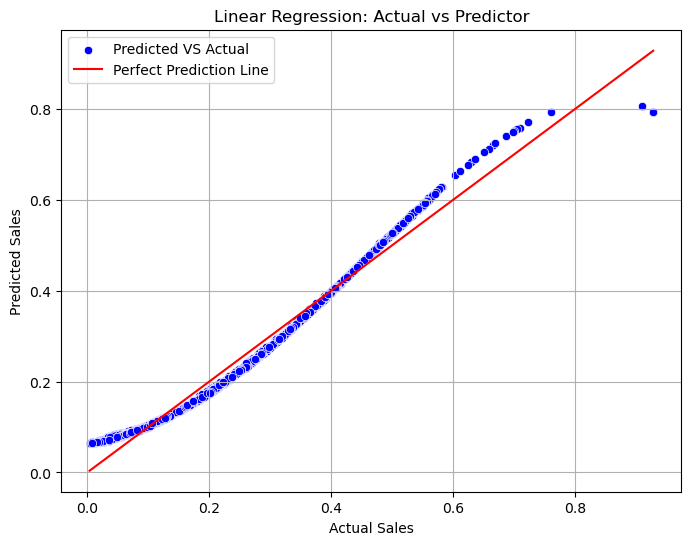

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=pred, color='blue', label='Predicted VS Actual')
sns.lineplot(x=y_test, y=y_test, color='red', label='Perfect Prediction Line')
plt.xlabel('Actual Sales')

plt.ylabel('Predicted Sales')
plt.title('Linear Regression: Actual vs Predictor')
plt.legend()
plt.grid(True)
plt.show()

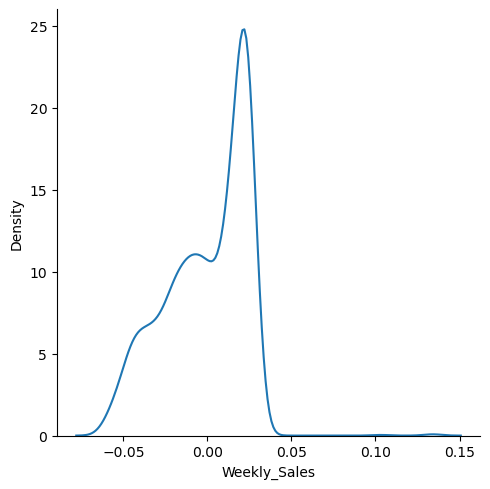

In [34]:
residuals = y_test-pred
sns.displot(residuals, kind='kde')

In [40]:
import pickle
pickle.dump(ridge, open('model.pkl','wb'))

In [41]:
model = pickle.load(open('model.pkl', 'rb'))

In [42]:
model.predict(x_test)

array([0.47585401, 0.08467688, 0.26833427, ..., 0.47800391, 0.10830525,
       0.22293963])

In [62]:
scaler = MinMaxScaler()
scaler.fit(x_train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [63]:
pickle.dump(scaler, open('scaler.pkl','wb'))

In [64]:
scaler = pickle.load(open('scaler.pkl', 'rb'))